In [1]:
# Problem Statement:-

# Thyroid disease is a common cause of medical diagnosis and prediction, with an onset
# that is difficult to forecast in medical research. The thyroid gland is one of our body's
# most vital organs. Thyroid hormone releases are responsible for metabolic regulation.
# Hyperthyroidism and hypothyroidism are one of the two common diseases of the thyroid
# that releases thyroid hormones in regulating the rate of body's metabolism.

# The main goal is to predict the estimated risk on a patient's chance of obtaining thyroid
# disease or not.

# Approach:- 
# The classical machine learning tasks like Data Exploration, Data Cleaning,
# Feature Engineering, Model Building and Model Testing. Try out different machine
# learning algorithms that’s best fit for the above case.

# import some python libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the data

In [2]:
df = pd.read_csv("d:/data/hypothyroid.csv")
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


# getting a some info

In [3]:
df.shape

(3772, 30)

In [4]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

# data preprocessing for data cleaning

In [6]:
df.duplicated().sum()

61

In [7]:
df.drop_duplicates(keep=False,inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.rename(columns={'binaryClass':'Label'},inplace=True)

In [10]:
df['Label'].value_counts()

P    3387
N     291
Name: Label, dtype: int64

In [11]:
df['Label'] = df['Label'].map({'P':1,'N':0})

In [12]:
df['sex'].value_counts()

F    2396
M    1134
?     148
Name: sex, dtype: int64

In [13]:
df['pregnant'].value_counts()

f    3625
t      53
Name: pregnant, dtype: int64

In [14]:
df['T3 measured'].value_counts()

t    3001
f     677
Name: T3 measured, dtype: int64

In [15]:
df['query hypothyroid'].value_counts()

f    3444
t     234
Name: query hypothyroid, dtype: int64

In [16]:
df['query hyperthyroid'].value_counts()

f    3446
t     232
Name: query hyperthyroid, dtype: int64

In [17]:
df['TBG'].value_counts()

?    3678
Name: TBG, dtype: int64

In [18]:
del df['TBG']

In [19]:
df['referral source'].value_counts()

other    2107
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64

In [20]:
df = pd.get_dummies(df,columns=["referral source"])
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T4U,FTI measured,FTI,TBG measured,Label,referral source_STMW,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other
0,41,F,f,f,f,f,f,f,f,f,...,1.14,t,109,f,1,0,1,0,0,0
1,23,F,f,f,f,f,f,f,f,f,...,?,f,?,f,1,0,0,0,0,1
2,46,M,f,f,f,f,f,f,f,f,...,0.91,t,120,f,1,0,0,0,0,1
3,70,F,t,f,f,f,f,f,f,f,...,?,f,?,f,1,0,0,0,0,1
4,70,F,f,f,f,f,f,f,f,f,...,0.87,t,70,f,1,0,0,0,1,0


In [21]:
df = df.replace({'F':1,'M':0,'t':1,'f':0,'?':np.NAN})

In [22]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T4U,FTI measured,FTI,TBG measured,Label,referral source_STMW,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other
0,41,1.0,0,0,0,0,0,0,0,0,...,1.14,1,109,0,1,0,1,0,0,0
1,23,1.0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,1,0,0,0,0,1
2,46,0.0,0,0,0,0,0,0,0,0,...,0.91,1,120,0,1,0,0,0,0,1
3,70,1.0,1,0,0,0,0,0,0,0,...,NaN,0,NaN,0,1,0,0,0,0,1
4,70,1.0,0,0,0,0,0,0,0,0,...,0.87,1,70,0,1,0,0,0,1,0


In [23]:
df.isna().sum()

age                            1
sex                          148
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          277
T3 measured                    0
T3                           677
TT4 measured                   0
TT4                          139
T4U measured                   0
T4U                          295
FTI measured                   0
FTI                          293
TBG measured                   0
Label                          0
referral source_STMW           0
referral source_SVHC           0
referral s

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 0 to 3771
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3677 non-null   object 
 1   sex                        3530 non-null   float64
 2   on thyroxine               3678 non-null   int64  
 3   query on thyroxine         3678 non-null   int64  
 4   on antithyroid medication  3678 non-null   int64  
 5   sick                       3678 non-null   int64  
 6   pregnant                   3678 non-null   int64  
 7   thyroid surgery            3678 non-null   int64  
 8   I131 treatment             3678 non-null   int64  
 9   query hypothyroid          3678 non-null   int64  
 10  query hyperthyroid         3678 non-null   int64  
 11  lithium                    3678 non-null   int64  
 12  goitre                     3678 non-null   int64  
 13  tumor                      3678 non-null   int64

# Data Exploration

In [25]:
# visualize the train data

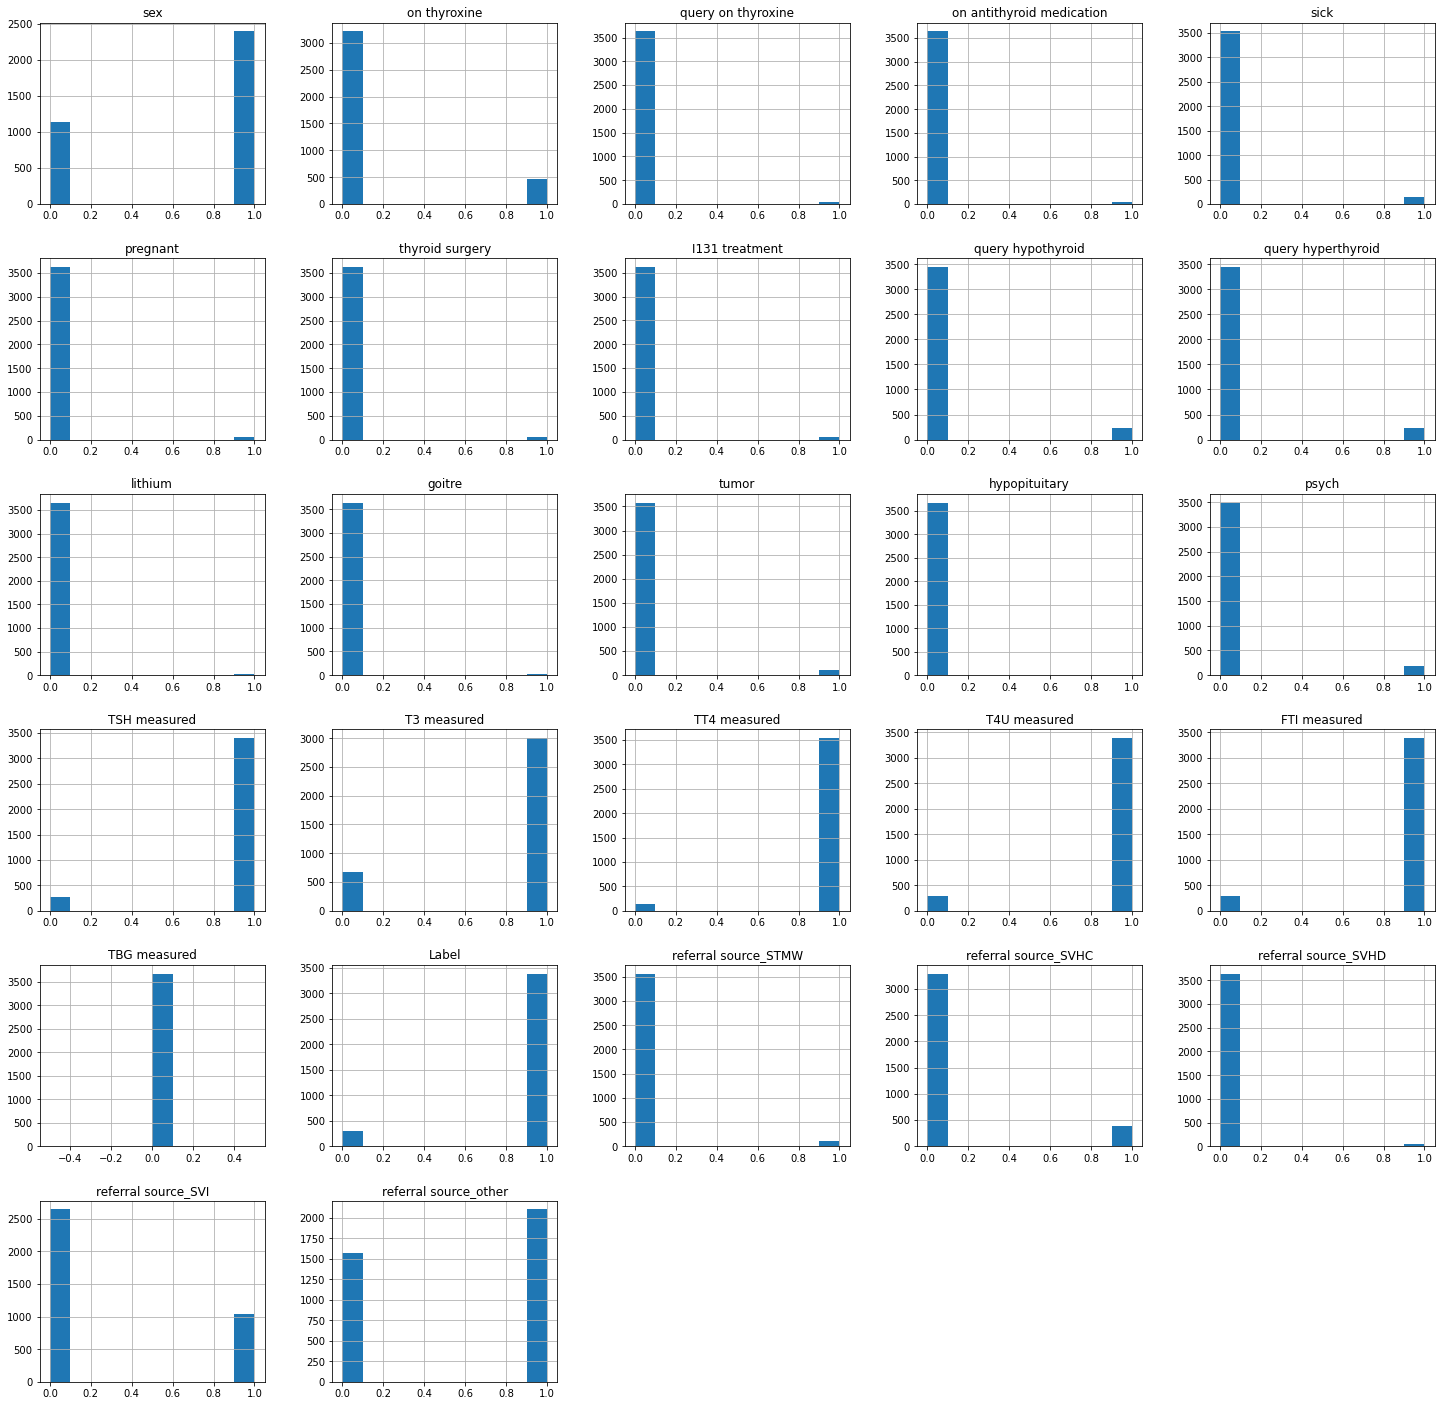

In [26]:
df.hist(figsize=(25,25))
plt.show()

In [27]:
# replacing NAN values

In [28]:
df.columns[df.isna().any()].tolist()

['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [29]:
#replacing null values by median because all these features show a skewed distribution.
df['age'].fillna(df['age'].median(),inplace=True)
df['sex'].fillna(df['sex'].median(),inplace=True)
df['TSH'].fillna(df['TSH'].median(),inplace=True)
df['T3'].fillna(df['T3'].median(),inplace=True)
df['TT4'].fillna(df['TT4'].median(),inplace=True)
df['T4U'].fillna(df['T4U'].median(),inplace=True)
df['FTI'].fillna(df['FTI'].median(),inplace=True)

In [30]:
df.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
Label                        0
referral source_STMW         0
referral source_SVHC         0
referral source_SVHD         0
referral source_SVI          0
referral

In [31]:
#visualize the imputed data

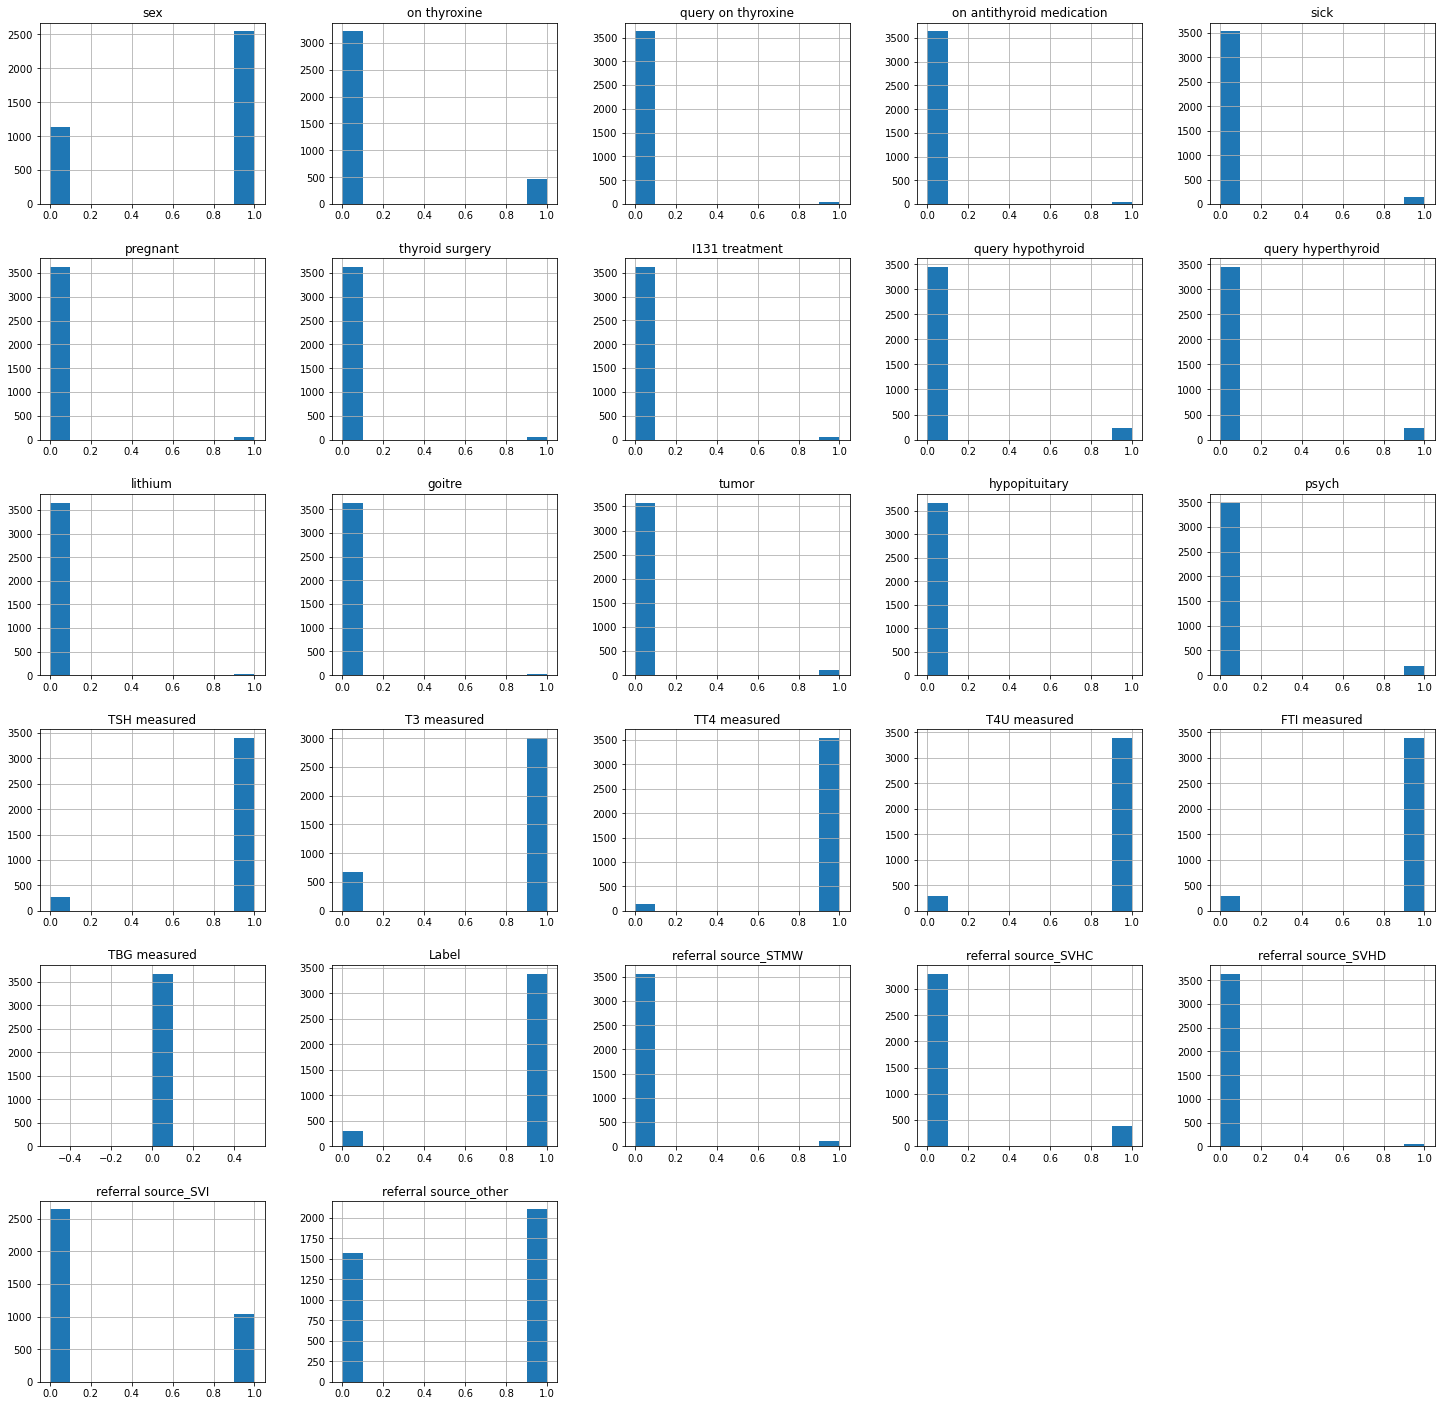

In [32]:
df.hist(figsize=(25,25))
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 0 to 3771
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3678 non-null   object 
 1   sex                        3678 non-null   float64
 2   on thyroxine               3678 non-null   int64  
 3   query on thyroxine         3678 non-null   int64  
 4   on antithyroid medication  3678 non-null   int64  
 5   sick                       3678 non-null   int64  
 6   pregnant                   3678 non-null   int64  
 7   thyroid surgery            3678 non-null   int64  
 8   I131 treatment             3678 non-null   int64  
 9   query hypothyroid          3678 non-null   int64  
 10  query hyperthyroid         3678 non-null   int64  
 11  lithium                    3678 non-null   int64  
 12  goitre                     3678 non-null   int64  
 13  tumor                      3678 non-null   int64

In [34]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T4U,FTI measured,FTI,TBG measured,Label,referral source_STMW,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other
0,41,1.0,0,0,0,0,0,0,0,0,...,1.14,1,109,0,1,0,1,0,0,0
1,23,1.0,0,0,0,0,0,0,0,0,...,0.98,0,107.0,0,1,0,0,0,0,1
2,46,0.0,0,0,0,0,0,0,0,0,...,0.91,1,120,0,1,0,0,0,0,1
3,70,1.0,1,0,0,0,0,0,0,0,...,0.98,0,107.0,0,1,0,0,0,0,1
4,70,1.0,0,0,0,0,0,0,0,0,...,0.87,1,70,0,1,0,0,0,1,0


In [35]:
# Exploring features data with visualization

C:\Users\karun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


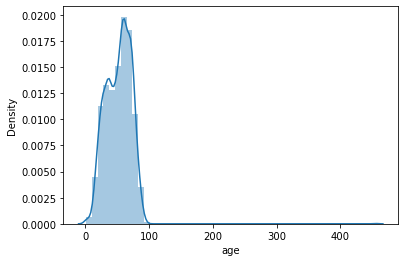

In [36]:
sns.distplot(df['age'],kde=True)
plt.show()

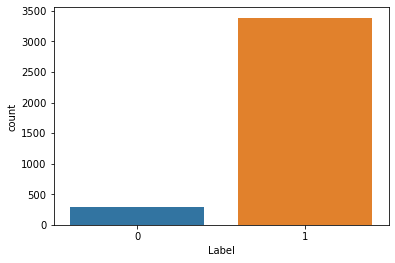

In [37]:
sns.countplot(x='Label',data=df)
plt.show()

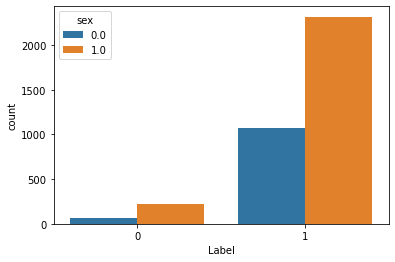

In [38]:
sns.countplot(x='Label', data=df,hue='sex')
plt.show()

<AxesSubplot:xlabel='age', ylabel='count'>

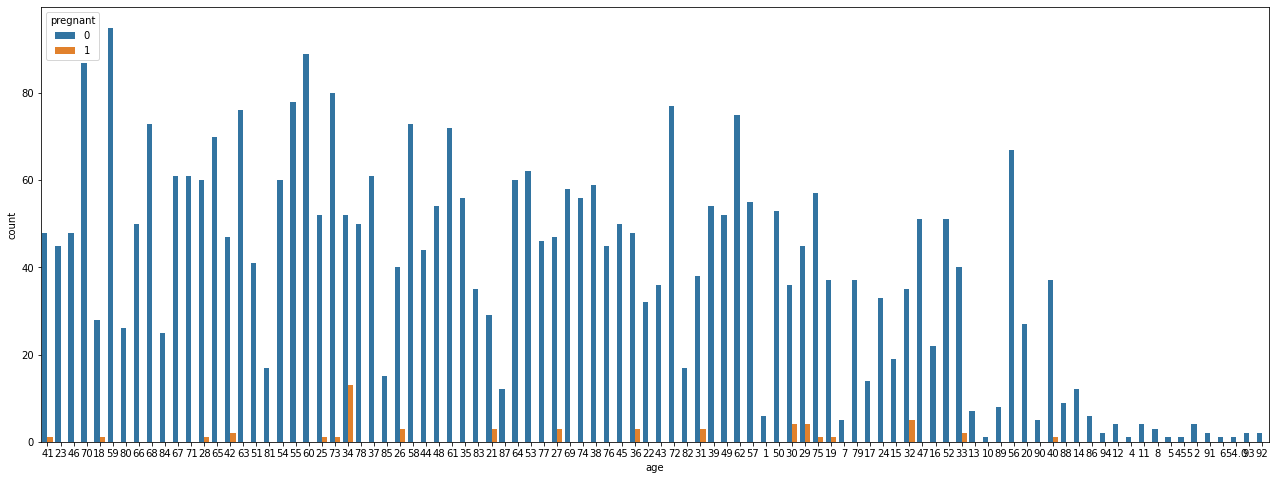

In [39]:
plt.figure(figsize=(22,8))
sns.countplot(x='age',data=df,hue='pregnant')

<AxesSubplot:xlabel='age', ylabel='count'>

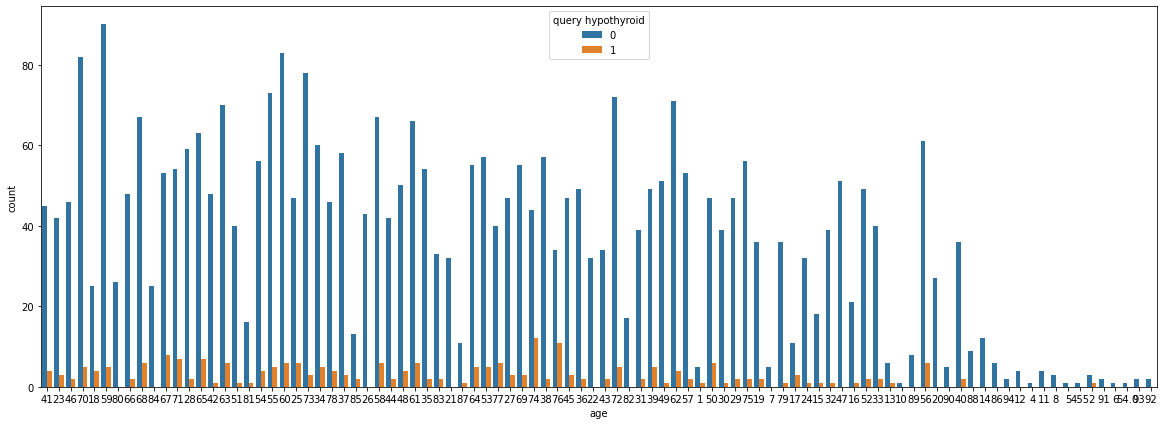

In [40]:
plt.figure(figsize=(20,7))
sns.countplot(x='age',data=df,hue='query hypothyroid')

<AxesSubplot:xlabel='query hyperthyroid', ylabel='count'>

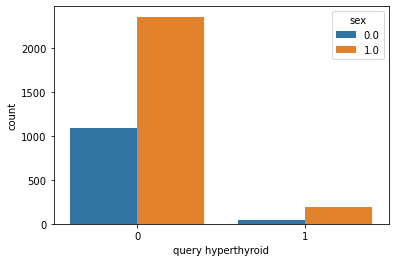

In [41]:
sns.countplot(x='query hyperthyroid',data=df,hue='sex')

<AxesSubplot:xlabel='age', ylabel='count'>

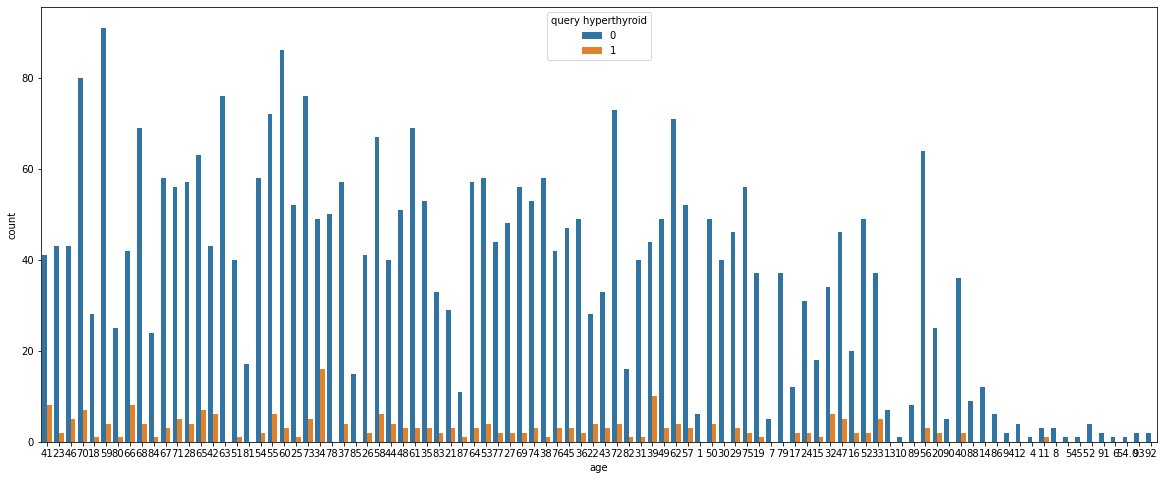

In [42]:
plt.figure(figsize=(20,8))
sns.countplot(x='age',data=df,hue='query hyperthyroid')

<AxesSubplot:xlabel='TSH', ylabel='count'>

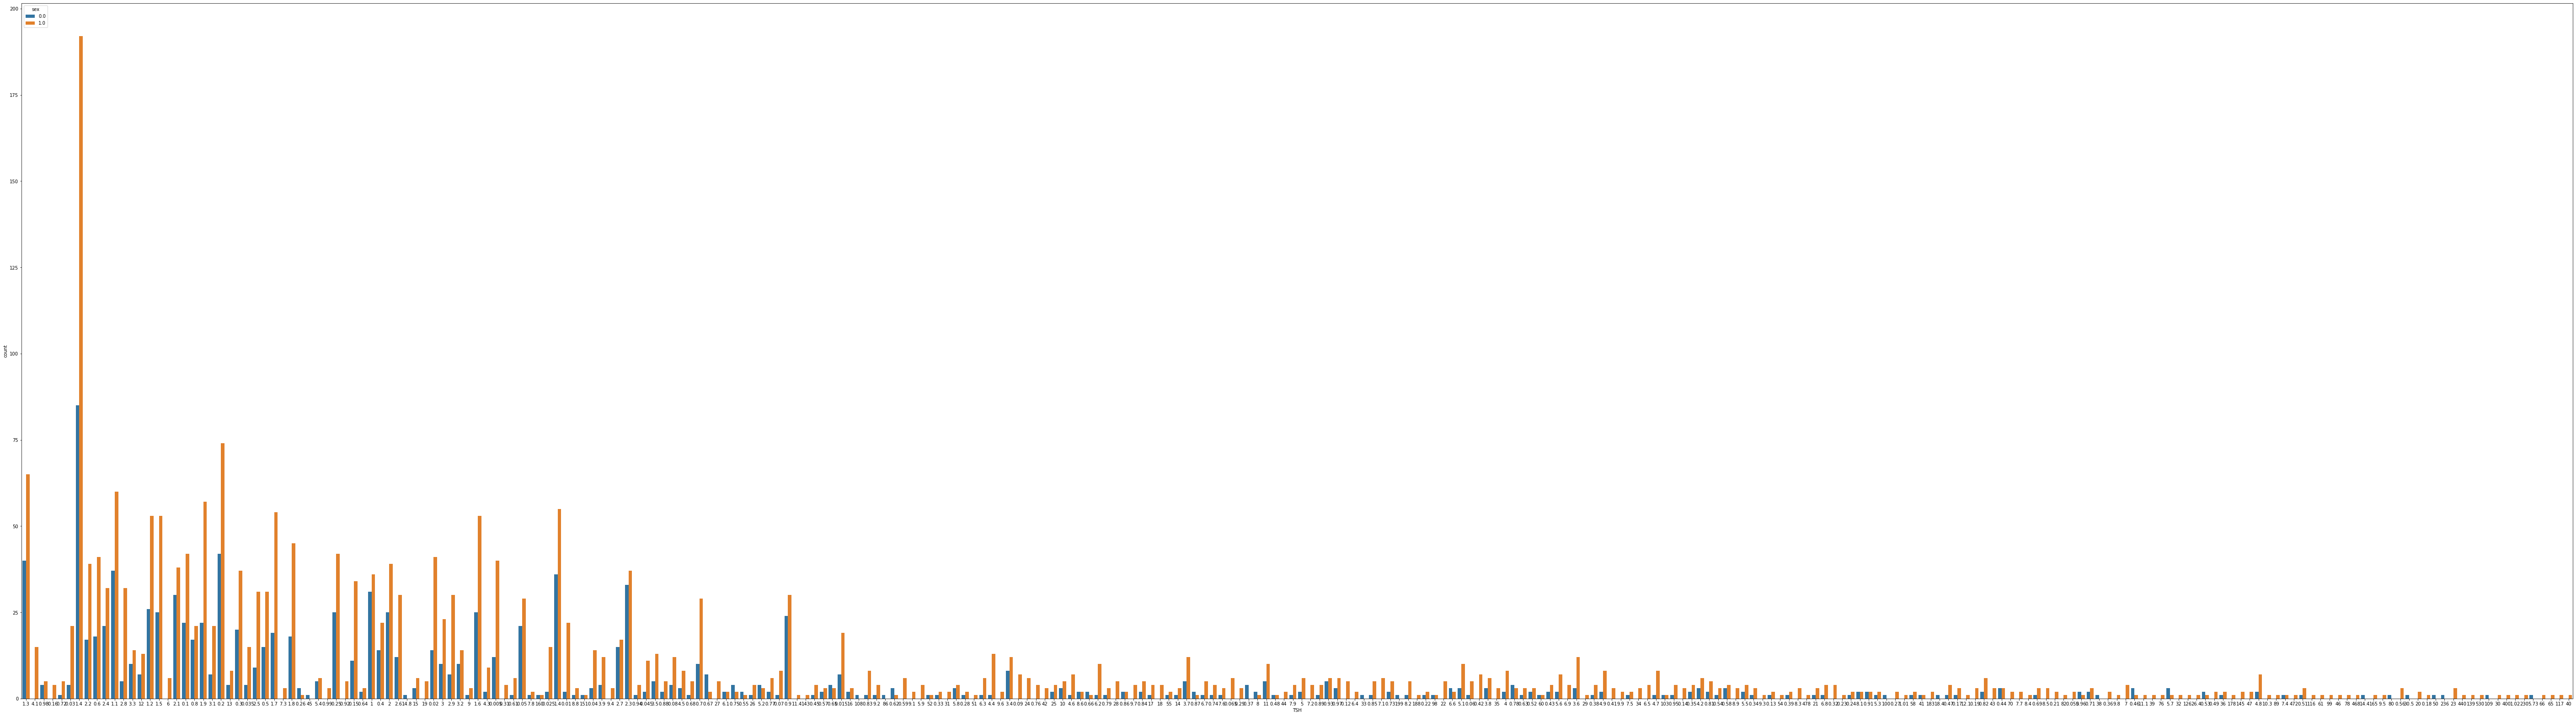

In [43]:
plt.figure(figsize=(100,28))
sns.countplot(x='TSH',data=df,hue='sex')
#plt.xticks(rotation=120)

<AxesSubplot:xlabel='sex', ylabel='count'>

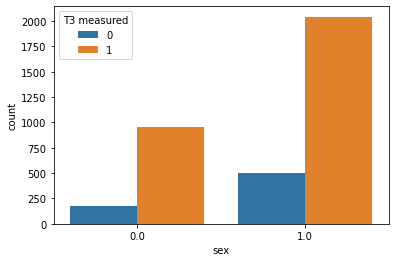

In [44]:
sns.countplot(x='sex',data=df,hue='T3 measured')

<AxesSubplot:xlabel='T3', ylabel='count'>

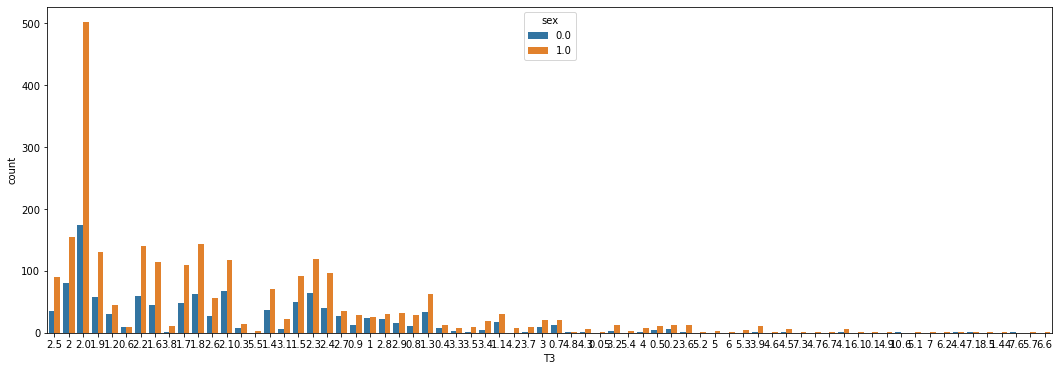

In [45]:
plt.figure(figsize=(18,6))
sns.countplot(x='T3',data=df,hue='sex')

<AxesSubplot:xlabel='TT4 measured', ylabel='count'>

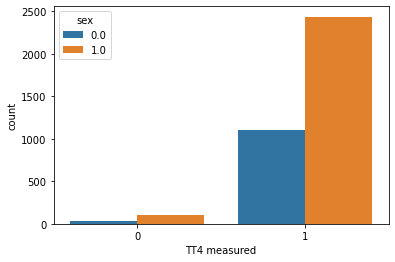

In [46]:
sns.countplot(x='TT4 measured',data=df,hue='sex')

<AxesSubplot:xlabel='T4U measured', ylabel='count'>

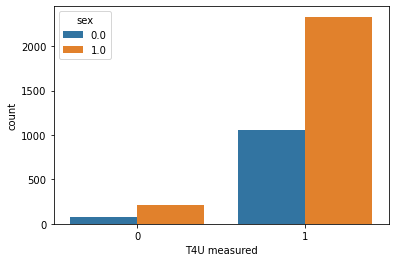

In [47]:
sns.countplot(x='T4U measured',data=df,hue='sex')

<AxesSubplot:xlabel='FTI measured', ylabel='count'>

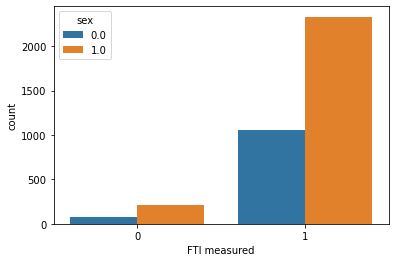

In [48]:
sns.countplot(x='FTI measured',data=df,hue='sex')

In [49]:
# using Correlation Heatmap function

In [50]:
df.corr = df.corr()
df.corr

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,TT4 measured,T4U measured,FTI measured,TBG measured,Label,referral source_STMW,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other
sex,1.000000,0.101181,-0.043643,0.026026,-0.005040,0.080729,0.036267,0.024326,0.046185,0.064252,...,-0.039694,-0.019410,-0.020304,NaN,-0.053921,0.114896,-0.144052,0.011637,-0.115508,0.151907
on thyroxine,0.101181,1.000000,0.004895,-0.001344,-0.044082,0.009027,0.036512,0.062291,0.092194,-0.024482,...,-0.014877,0.012710,0.011987,NaN,0.084068,-0.019680,-0.100717,0.016629,-0.186607,0.235385
query on thyroxine,-0.043643,0.004895,1.000000,-0.012464,0.012006,0.044910,0.005507,-0.014989,-0.030600,-0.011144,...,0.023266,0.026022,0.025867,NaN,0.008315,-0.020805,-0.040199,0.010770,-0.005518,0.034919
on antithyroid medication,0.026026,-0.001344,-0.012464,1.000000,-0.021664,0.074081,-0.012838,0.007056,-0.017066,0.110932,...,-0.019698,-0.025852,-0.026146,NaN,0.021528,0.056540,-0.036357,-0.010992,-0.066397,0.065505
sick,-0.005040,-0.044082,0.012006,-0.021664,1.000000,-0.024671,-0.001377,-0.026052,0.026430,-0.035813,...,-0.032351,-0.006181,-0.006610,NaN,0.003242,-0.036160,-0.065338,0.277006,0.066919,-0.065130
pregnant,0.080729,0.009027,0.044910,0.074081,-0.024671,1.000000,-0.014621,-0.015439,-0.022171,0.118780,...,0.012000,0.027307,0.027149,NaN,0.035442,0.310511,-0.033961,-0.012518,-0.075616,-0.015505
thyroid surgery,0.036267,0.036512,0.005507,-0.012838,-0.001377,-0.014621,1.000000,0.002720,-0.012824,0.015549,...,0.023964,0.002108,0.001872,NaN,0.018538,0.005126,-0.041405,0.009756,-0.029942,0.049064
I131 treatment,0.024326,0.062291,-0.014989,0.007056,-0.026052,-0.015439,0.002720,1.000000,0.046517,0.064793,...,0.025305,0.021769,0.021580,NaN,-0.002662,-0.022628,-0.043722,-0.013218,-0.079847,0.110252
query hypothyroid,0.046185,0.092194,-0.030600,-0.017066,0.026430,-0.022171,-0.012824,0.046517,1.000000,0.019427,...,-0.000915,-0.005051,-0.005590,NaN,-0.084543,0.005669,-0.052911,0.005642,-0.019290,0.047176
query hyperthyroid,0.064252,-0.024482,-0.011144,0.110932,-0.035813,0.118780,0.015549,0.064793,0.019427,1.000000,...,-0.065876,-0.026320,-0.026923,NaN,0.013904,0.058159,-0.070603,-0.005023,-0.090115,0.106480


<AxesSubplot:>

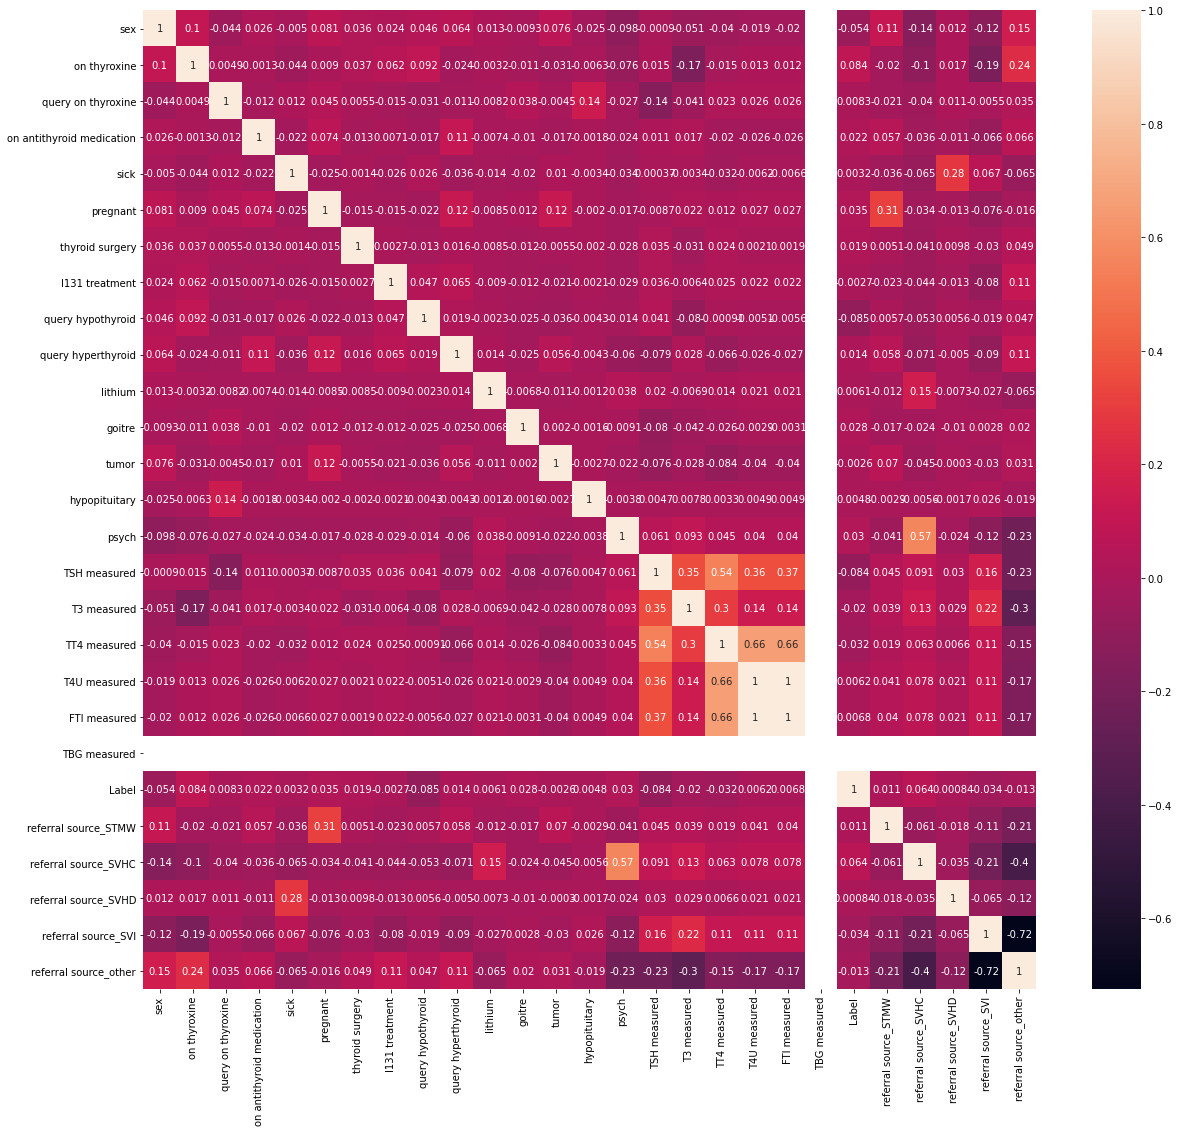

In [51]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr,annot=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 0 to 3771
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3678 non-null   object 
 1   sex                        3678 non-null   float64
 2   on thyroxine               3678 non-null   int64  
 3   query on thyroxine         3678 non-null   int64  
 4   on antithyroid medication  3678 non-null   int64  
 5   sick                       3678 non-null   int64  
 6   pregnant                   3678 non-null   int64  
 7   thyroid surgery            3678 non-null   int64  
 8   I131 treatment             3678 non-null   int64  
 9   query hypothyroid          3678 non-null   int64  
 10  query hyperthyroid         3678 non-null   int64  
 11  lithium                    3678 non-null   int64  
 12  goitre                     3678 non-null   int64  
 13  tumor                      3678 non-null   int64

In [53]:
#data type converting 

In [54]:
df['age'] = df['age'].astype('int64')
df['FTI'] = df['FTI'].astype('float')
df['TSH'] = df['TSH'].astype('float')
df['T3'] = df['T3'].astype('float')
df['TT4'] = df['TT4'].astype('float')
df['T4U'] = df['T4U'].astype('float')
df['sex'] = df['sex'].astype('int64')

In [55]:
df['referral source_STMW'] = df['referral source_STMW'].astype('int64')
df['referral source_SVHC'] = df['referral source_SVHC'].astype('int64')
df['referral source_SVI'] = df['referral source_SVI'].astype('int64')
df['referral source_SVHD'] = df['referral source_SVHD'].astype('int64')
df['referral source_other'] = df['referral source_other'].astype('int64')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 0 to 3771
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3678 non-null   int64  
 1   sex                        3678 non-null   int64  
 2   on thyroxine               3678 non-null   int64  
 3   query on thyroxine         3678 non-null   int64  
 4   on antithyroid medication  3678 non-null   int64  
 5   sick                       3678 non-null   int64  
 6   pregnant                   3678 non-null   int64  
 7   thyroid surgery            3678 non-null   int64  
 8   I131 treatment             3678 non-null   int64  
 9   query hypothyroid          3678 non-null   int64  
 10  query hyperthyroid         3678 non-null   int64  
 11  lithium                    3678 non-null   int64  
 12  goitre                     3678 non-null   int64  
 13  tumor                      3678 non-null   int64

In [57]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T4U,FTI measured,FTI,TBG measured,Label,referral source_STMW,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other
0,41,1,0,0,0,0,0,0,0,0,...,1.14,1,109.0,0,1,0,1,0,0,0
1,23,1,0,0,0,0,0,0,0,0,...,0.98,0,107.0,0,1,0,0,0,0,1
2,46,0,0,0,0,0,0,0,0,0,...,0.91,1,120.0,0,1,0,0,0,0,1
3,70,1,1,0,0,0,0,0,0,0,...,0.98,0,107.0,0,1,0,0,0,0,1
4,70,1,0,0,0,0,0,0,0,0,...,0.87,1,70.0,0,1,0,0,0,1,0


Now my data has cleaned 


# Modeling the data

In [58]:
# defining the features and target variables

In [59]:
x = df.drop('Label',axis=1)
y = df['Label']

In [60]:
print(x.shape,y.shape)

(3678, 32) (3678,)


In [61]:
#Splitting the data into training and testing 

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2942, 32), (736, 32), (2942,), (736,))

# importing some Machine learning algorithms 

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import plot_confusion_matrix

In [65]:
# 1. Naive bayes algorithm

In [66]:
NB = GaussianNB()
NB.fit(x_train,y_train)
NB.score(x_test,y_test)

0.21739130434782608

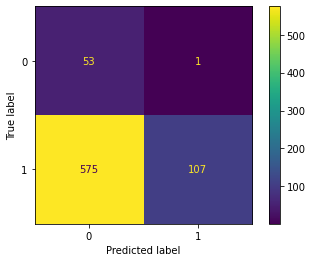

In [67]:
_=plot_confusion_matrix(NB,x_test,y_test)

In [68]:
# 2. LinearRegression algorithm

In [69]:
reg = LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.25492896310639124

In [70]:
# 3. KNN algorithm

In [71]:
KNN = KNeighborsClassifier(n_neighbors=3,weights='distance')
KNN.fit(x_train,y_train)
KNN.score(x_test,y_test)

0.9578804347826086

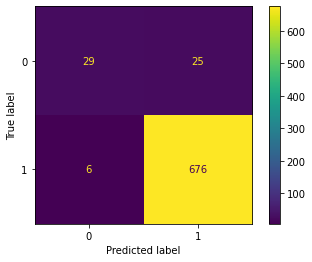

In [72]:
_=plot_confusion_matrix(KNN,x_test,y_test)

In [73]:
# 4.LogisticRegression algorithm

In [74]:
LR = LogisticRegression(random_state=50,max_iter=100)
LR.fit(x_train,y_train)
LR.score(x_test,y_test)

C:\Users\karun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9605978260869565

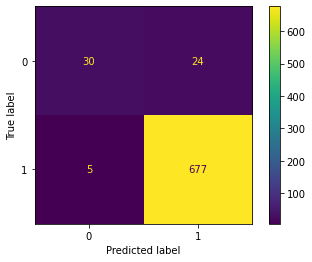

In [75]:
_=plot_confusion_matrix(LR,x_test,y_test)

In [76]:
# 5.somport vector classifier

In [77]:
clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.967391304347826

In [78]:
clf = SVC(probability=True)
clf.fit(x_train,y_train)

SVC(probability=True)

In [79]:
print(clf.predict_proba(x_test))
#print(clf.predict(x_test))

[[0.02391177 0.97608823]
 [0.02789276 0.97210724]
 [0.01747213 0.98252787]
 ...
 [0.02826993 0.97173007]
 [0.01306238 0.98693762]
 [0.01089339 0.98910661]]


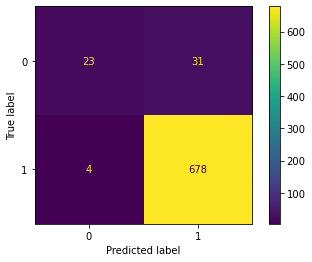

In [80]:
_=plot_confusion_matrix(clf,x_test,y_test)

In [81]:
# 6.Decision Tree algorithm

In [82]:
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(x_train,y_train)
DT.score(x_test,y_test)

0.9959239130434783

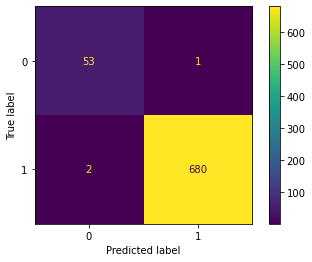

In [83]:
_=plot_confusion_matrix(DT,x_test,y_test)

In [84]:
# 7.RandomForestClassifier algorithm

In [85]:
RFC = RandomForestClassifier(criterion='entropy')
RFC.fit(x_train,y_train)
RFC.score(x_test,y_test)

0.9959239130434783

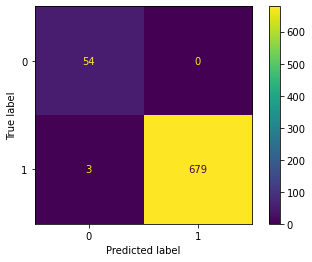

In [86]:
_=plot_confusion_matrix(RFC,x_test,y_test)

# importing a some model accuracy score libraries 
because Decision tree and RandomForestClassifier both ML algorithms are being given almost
same accuracy

In [87]:
from sklearn.metrics import (accuracy_score,balanced_accuracy_score,
                            cohen_kappa_score,precision_score,recall_score,
                             f1_score,roc_curve,roc_auc_score)

In [88]:
## Decision tree related score
y_predict = DT.predict(x_test)
print('accuracy:',accuracy_score(y_test,y_predict))
print('balance_accuracy:',balanced_accuracy_score(y_test,y_predict))
print('kappa_score:',cohen_kappa_score(y_test,y_predict))
print('precision:',precision_score(y_test,y_predict))
print('Recall:',recall_score(y_test,y_predict))
print('f1_score:',f1_score(y_test,y_predict))

accuracy: 0.9959239130434783
balance_accuracy: 0.9892744650809167
kappa_score: 0.9702762371439341
precision: 0.9985315712187959
Recall: 0.9970674486803519
f1_score: 0.9977989728539985


In [89]:
## RandomForestClassifier related score
y1_predict = RFC.predict(x_test)
print('accuracy:',accuracy_score(y_test,y1_predict))
print('balance_accuracy:',balanced_accuracy_score(y_test,y1_predict))
print('kappa_score:',cohen_kappa_score(y_test,y1_predict))
print('precision:',precision_score(y_test,y1_predict))
print('Recall:',recall_score(y_test,y1_predict))
print('f1_score:',f1_score(y_test,y1_predict))

accuracy: 0.9959239130434783
balance_accuracy: 0.9978005865102639
kappa_score: 0.9707704527402701
precision: 1.0
Recall: 0.9956011730205279
f1_score: 0.9977957384276267


In [90]:
# Linear regression related score
y2_predict = LR.predict(x_test)
print('accuracy:',accuracy_score(y_test,y2_predict))
print('balance_accuracy:',balanced_accuracy_score(y_test,y2_predict))
print('kappa_score:',cohen_kappa_score(y_test,y2_predict))
print('precision:',precision_score(y_test,y2_predict))
print('Recall:',recall_score(y_test,y2_predict))
print('f1_score:',f1_score(y_test,y2_predict))

accuracy: 0.9605978260869565
balance_accuracy: 0.7741120886282177
kappa_score: 0.6542025792236408
precision: 0.9657631954350927
Recall: 0.9926686217008798
f1_score: 0.9790310918293565


In [91]:
# KNN related score
y3_predict = KNN.predict(x_test)
print('accuracy:',accuracy_score(y_test,y3_predict))
print('balance_accuracy:',balanced_accuracy_score(y_test,y3_predict))
print('kappa_score:',cohen_kappa_score(y_test,y3_predict))
print('precision:',precision_score(y_test,y3_predict))
print('Recall:',recall_score(y_test,y3_predict))
print('f1_score:',f1_score(y_test,y3_predict))

accuracy: 0.9578804347826086
balance_accuracy: 0.7641196915390465
kappa_score: 0.6303544812390642
precision: 0.9643366619115549
Recall: 0.9912023460410557
f1_score: 0.9775849602313811


In [92]:
# SVM related score
y4_predict = clf.predict(x_test)
print('accuracy:',accuracy_score(y_test,y4_predict))
print('balance_accuracy:',balanced_accuracy_score(y_test,y4_predict))
print('kappa_score:',cohen_kappa_score(y_test,y4_predict))
print('precision:',precision_score(y_test,y4_predict))
print('Recall:',recall_score(y_test,y4_predict))
print('f1_score:',f1_score(y_test,y4_predict))

accuracy: 0.9524456521739131
balance_accuracy: 0.7100304116433149
kappa_score: 0.5456790123456791
precision: 0.9562764456981664
Recall: 0.9941348973607038
f1_score: 0.9748382458662833


# AUC-ROC Curve
still don't have given clarity that which one is alogrithm best? that's why i'm using ROC-CURVE method

In [93]:
pred_prob1 = DT.predict_proba(x_test)
pred_prob2 = RFC.predict_proba(x_test)
pred_prob3 = LR.predict_proba(x_test)
pred_prob4 = KNN.predict_proba(x_test)
pred_prob5 = clf.predict_proba(x_test)

In [94]:
fpr1,tpr1,thresh1 = roc_curve(y_test,pred_prob1[:,1],pos_label=1)
fpr2,tpr2,thresh2 = roc_curve(y_test,pred_prob2[:,1],pos_label=1)
fpr3,tpr3,thresh3 = roc_curve(y_test,pred_prob3[:,1],pos_label=1)
fpr4,tpr4,thresh4 = roc_curve(y_test,pred_prob4[:,1],pos_label=1)
fpr5,tpr5,thresh5 = roc_curve(y_test,pred_prob5[:,1],pos_label=1)

In [95]:
random_probs = [ 0 for i in range(len(y_test))]
p_fpr,p_tpr,_ = roc_curve(y_test,random_probs,pos_label=1)

In [96]:
# roc auc score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test,pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test,pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test,pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test,pred_prob5[:,1])
print(auc_score1,auc_score2,auc_score3,auc_score4,auc_score5)

0.9892744650809167 0.9994026284348865 0.988514173998045 0.8331296839361356 0.9892880417073965


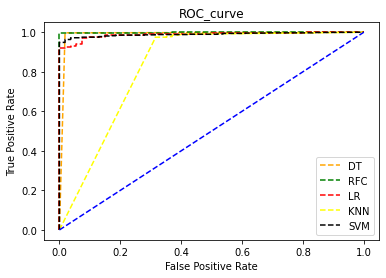

In [97]:
plt.plot(fpr1,tpr1,linestyle='--',color='orange',label='DT')
plt.plot(fpr2,tpr2,linestyle='--',color='green',label='RFC')
plt.plot(fpr3,tpr3,linestyle='--',color='red',label='LR')
plt.plot(fpr4,tpr4,linestyle='--',color='yellow',label='KNN')
plt.plot(fpr5,tpr5,linestyle='--',color='black',label='SVM')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC_curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

we can see here through the roc figure that my best machine learning algorithm is 
RFC(RandomForestClassifier).as well as you can see also roc accuracy score which is predicted.

roc_auc_score(DT):- 0.9892744650809167

roc_auc_score(RFC):- 0.9994026284348865

roc_auc_score(LR):- 0.988514173998045

roc_auc_score(KNN):- 0.8331296839361356

roc_auc_score(SVM):-  0.9892880417073965

Now you can easily say which one my best algorithm---- RandomForestClassifier Algorithm..
previous we cannot evaluate easily. Actually some accuracy score is little bit colser even 
somewhere same accuracy but now is cleared after find ROC Curve.